In [1]:
#掛載GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


template


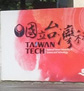

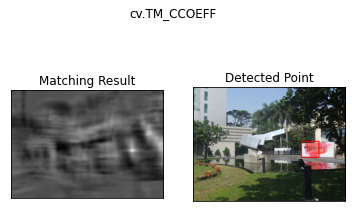

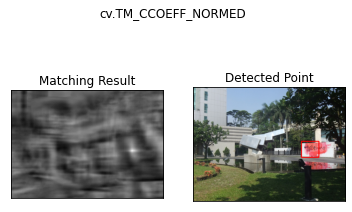

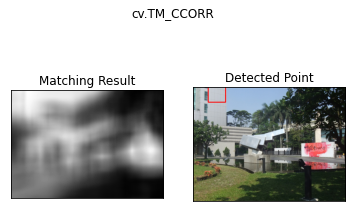

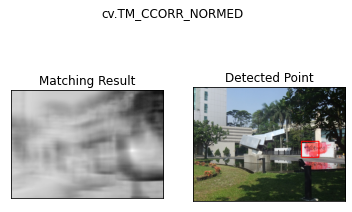

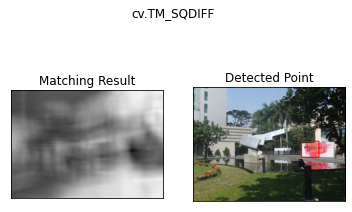

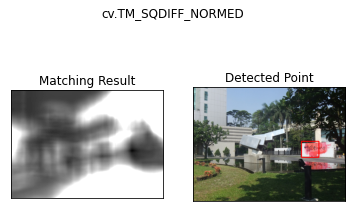

In [16]:
'''模版匹配(template matching)'''
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
pathname = '/content/gdrive/My Drive/Colab Notebooks/'

img = cv.imread(pathname+'data/ntust.jpg',1)
print('img')
cv2_imshow(img)
img2 = img.copy()
template = cv.imread(pathname+'data/c.jpg',1) #待查詢的模版
w, h, ch = template.shape
print('template')
cv2_imshow(template)

#六種模版匹配統計方法
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth) #依序讀取 methods 中的字串
    # 模版匹配，獲得統計圖
    res = cv.matchTemplate(img,template,method)
    # 找出統計圖上最小值與最大值的數值(val)與(x,y)座標(loc)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # 如果使用 TM_SQDIFF 或 TM_SQDIFF_NORMED 方法，取最小值的位置，當roi矩形框的左上角
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc # roi矩形框的左上角(x,y)座標
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h) # roi矩形框的右下角(x,y)座標
    cv.rectangle(img,top_left, bottom_right, (0,0,255), 4) # 繪製roi矩形框
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
